In [1]:
import pandas as pd
import time
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
import matplotlib.pyplot as plt

In [2]:
WNBA ={
    'ATL':('ATL','Atlanta Dream','East'), 'CHI':('CHI','Chicago Sky','East'), 'CON':('CON','Connecticut Sun','East'),
    'DAL':('DAL','Dallas Wings','West'), 'IND':('IND','Indiana Fever','East'), 'LAS':('LAS','Los Angeles Sparks','West'),
    'LVA':('LVA','Las Vegas Aces','West'), 'MIN':('MIN','Minnesota Lynx','West'), 'NYL':('NYL','New York Liberty','East'),
    'PHO':('PHO','Phoenix Mercury','West'), 'SEA':('SEA','Seattle Storm','West'), 'WAS':('WAS','Washington Mystics','East')
      }
start_link = 'https://www.basketball-reference.com/wnba/teams/'
end_link = '/2021_games.html'

selected_data = []   # in global scope rather than local scope to function
def create_checklist():


    names = []
    checkbox_objects = []
    for val in WNBA.values():
        key = val[0]
        name = val[1]
        checkbox_objects.append(widgets.ToggleButton(description=key, value=False, tooltip=name))        
        names.append(key)

    arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}
    box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='50%')
    
    ui = widgets.HBox(children=checkbox_objects)


    def select_data(**kwargs):
        selected_data.clear()

        for key in kwargs:
            if kwargs[key] is True:
                selected_data.append(key)

        print(selected_data)

    out = widgets.interactive_output(select_data, arg_dict)
    display(ui)
    return out

def create_df(list_df):
    """Формирование дата фрема команды из таблицы регулярки и плейофф(если есть)"""
    
    df_poff = pd.DataFrame()
    for df in list_df:
        df = df[['Date', 'Unnamed: 2', 'Opponent', 'Tm', 'Opp', 'Streak']].rename(columns={'Unnamed: 2':'Road'})
        df = df[(df['Tm'] != 'Tm')]
        df.dropna(subset=['Tm'], inplace=True) # Remove missing values.
        df.reset_index(drop=True, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df_regul = df_poff
        df_poff = df

    df_total = pd.DataFrame()
    df_total = df_regul.append(df_poff, ignore_index=True)
    df_total.sort_values('Date', ascending=False, inplace=True)
    
    df_total['Tm'] = df_total.Tm.astype('int32')
    df_total['Opp'] = df_total.Opp.astype('int32')
    
    return df_total

def create_dicts(df_total):
    ''' Раздел счетчика чет нечет всего '''

    even = 0 # четный
    odd = 0 # нечетный

    even_dict = {}
    odd_dict = {}
    sum_even = 0
    sum_odd = 0
    list_ev_odd = []
    for it in df_total.Tm:
        if int(it) % 2 == 0:
            sum_even += 1 # Общая четных
            if odd != 0 and str(odd) not in odd_dict:
                odd_dict.setdefault(str(odd), 1)
                list_ev_odd.append(odd*-1)
            elif odd != 0 and str(odd) in odd_dict:
                odd_dict[str(odd)] += 1
                list_ev_odd.append(odd*-1)
            odd = 0
            even += 1
        elif int(it) % 2 != 0:
            sum_odd += 1 # Общая нечетных
            if even != 0 and str(even) not in even_dict:
                even_dict.setdefault(str(even), 1)
                list_ev_odd.append(even)
            elif even != 0 and str(even) in even_dict:
                even_dict[str(even)] += 1
                list_ev_odd.append(even)
            even = 0
            odd += 1

   
    if odd != 0 and str(odd) not in odd_dict: # т.к. запись в словарь происходит после смены чет/нечет то по окончанию
        odd_dict.setdefault(str(odd), 1)      # цикла переменная накопилась но смены уже не произойдет, поэтому записываю
        list_ev_odd.append(odd*-1)            # переменную после выхода из цикла
    elif odd != 0 and str(odd) in odd_dict:  
        odd_dict[str(odd)] += 1
        list_ev_odd.append(odd*-1)
    if even != 0 and str(even) not in even_dict:
        even_dict.setdefault(str(even), 1)
        list_ev_odd.append(even)
    elif even != 0 and str(even) in even_dict:
        even_dict[str(even)] += 1
        list_ev_odd.append(even)
   
    return sum_even, sum_odd, even_dict, odd_dict, list_ev_odd

def read_sort_dict(even_dict1, odd_dict1):
        """Вывод отсортированнного словаря """

        print('Статистика четного вхождения:')
        chance = 0
        list_key = list(even_dict1.keys())
        list_key.sort()
        for key in list_key:
            part = round(even_dict1[key]/sum(even_dict1.values()), 2)
            chance += even_dict1[key]/sum(even_dict1.values()) 
            print(key, 'подряд - ', even_dict1[key], 'раз ', part, ' --> ', round(chance, 2))
        
        print('')    
        print('Статистика нечетного вхождения:')
        chance = 0
        list_key = list(odd_dict1.keys())
        list_key.sort()
        for key in list_key:
            part = round(odd_dict1[key]/sum(odd_dict1.values()), 2)
            chance += odd_dict1[key]/sum(odd_dict1.values()) 
            print(key, 'подряд - ', odd_dict1[key], 'раз ', part, ' --> ', round(chance, 2))


In [14]:
for key, val in b.items():
    if key in a:
        c[key] += val
    else:
        c[key] = val

In [15]:
c

{'a': 1, 'b': 11, 'c': 9}

In [3]:
checklist = create_checklist()

EvOdd WNBA 18-10-2021, 21:58:15
#############################
----- команда 1 из 1 -----
WASHINGTON MYSTICS

Не найдено для 3-х подряд  Четных: 13 ( 0.41 )  Нечетных: 19 ( 0.59 )

Статистика четного вхождения:
1 подряд -  3 раз  0.43  -->  0.43
2 подряд -  2 раз  0.29  -->  0.71
3 подряд -  2 раз  0.29  -->  1.0

Статистика нечетного вхождения:
1 подряд -  4 раз  0.57  -->  0.57
3 подряд -  1 раз  0.14  -->  0.71
5 подряд -  1 раз  0.14  -->  0.86
7 подряд -  1 раз  0.14  -->  1.0


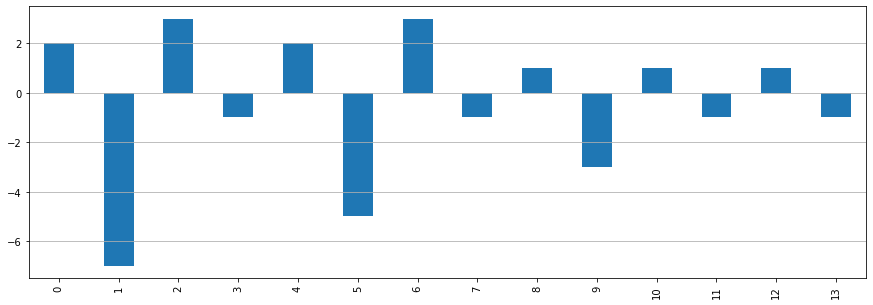

печать четного
{'1': 3, '3': 2, '2': 2}

печать нечетного
{'1': 4, '3': 1, '5': 1, '7': 1}

КОНЕЦ


In [50]:
count = 0
all_ = len(selected_data)
N = 3 # Поиск длины серии не менее N
N_not_only = True # Отображать стату не только команды, с длиной длиной серии не менее N
full_even_dict = {}
full_odd_dict = {}
if selected_data:
    print('EvOdd WNBA', time.strftime("%d-%m-%Y, %H:%M:%S") )
else:
    print('Не выбрана ни одна команда')
    
for team in selected_data:
    count += 1 
    link = start_link + team + end_link
    time.sleep(0.3)
    list_df = pd.read_html(link)
    print(f'#############################')
    print(f'----- команда {count} из {all_} -----')
    print(f'{WNBA[team][1].upper()}')
    print('')
    
################################################################################

    df_total = create_df(list_df) #Формирование дата фрема команды из таблицы регулярки и плейофф(если есть)

####################################################################    
    # Поиск в последних играх серии чет\нечет с длиной не менее N 
    len_even = 0
    len_odd = 0

    for item in df_total.Tm:
        if int(item) % 2 == 0:
            if len_odd != 0 : 
                if len_odd >= N:
                    print(f'НЕЧЕТНО {len_odd} раз(а) подряд', end='  ')
                else:
                    print(f'Не найдено для {N}-х подряд', end='  ')
                break
            len_odd = 0
            len_even += 1
        else:
            if len_even != 0 :
                if len_even >= N:
                    print(f'ЧЕТНО {len_even} раз(а) подряд', end='  ')
                else:
                    print(f'Не найдено для {N}-х подряд', end='  ')
                break
            len_even = 0
            len_odd += 1

####################################################################        
    if (len_even >= N or len_odd >= N) or N_not_only:
        sum_even, sum_odd, even_dict, odd_dict, list_ev_odd = create_dicts(df_total)      # Раздел счетчика чет нечет всего
        list_ev_odd.reverse()

        print('Четных:',sum_even, '(', round(sum_even/(sum_even+sum_odd),2), ')', end=' ')
        print(' Нечетных:',sum_odd, '(', round(sum_odd/(sum_even+sum_odd),2), ')')



        print('')
        read_sort_dict(even_dict, odd_dict) # Вывод отсортированнного словаря

    #     print('')
    #     print('')
    #     df_total = df_total.style.apply(lambda x: ["background-color: #ff33aa" 
    #                           if (i >= 2 and (v % 2 == 0 )) 
    #                           else "" for i, v in enumerate(x)], axis = 1)
    #     display(df_total.head(5))
        pd.Series(list_ev_odd).plot.bar(figsize=(15,5)).grid(axis='y')
        plt.show()
    #     print(pd.Series(list_ev_odd).describe())
    #     print(pd.Series(list_ev_odd).mode())

    
##Недоделан блок ниже подсчета ИТОГО по всем командам     
    even_dict, odd_dict =  create_dicts(df_total)[2:4]

    for key, val in even_dict.items():
        if key in full_even_dict:
            full_even_dict[key] += val
        else:
            full_even_dict[key] = val
    
    for key, val in odd_dict.items():
        if key in full_odd_dict:
            full_odd_dict[key] += val
        else:
            full_odd_dict[key] = val
print('печать четного')
print(full_even_dict)
print('')
print('печать нечетного')
print(full_odd_dict)
print('')
print('КОНЕЦ')


## Конец документа

In [46]:
print(full_even_dict)

{'2': 29, '1': 54, '3': 13, '6': 2, '4': 2, '5': 3}


In [47]:
full_odd_dict

{'1': 44, '2': 21, '3': 15, '5': 5, '4': 12, '6': 2, '7': 2}

<BarContainer object of 7 artists>

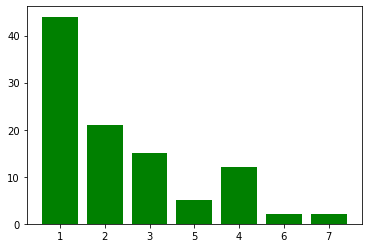

In [48]:
plt.bar(list(full_odd_dict.keys()), list(full_odd_dict.values()), color='g')

<BarContainer object of 6 artists>

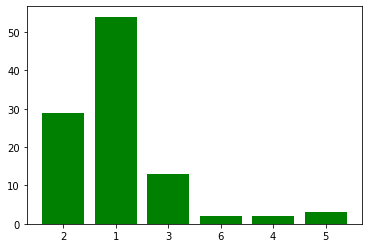

In [49]:
plt.bar(list(full_even_dict.keys()), list(full_even_dict.values()), color='g')